<a href="https://colab.research.google.com/github/veronicaramirezl/multiclass_deep_learning/blob/main/Spirals_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open ("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_decision_boundary, plot_predictions

helper_functions.py already exists, skipping download


In [2]:
# DEvce agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

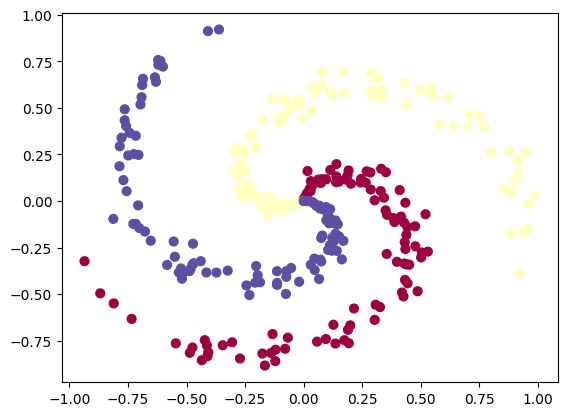

In [3]:
#Set hyperparameters for data creation
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [4]:
# Turn data into tensors

X = torch.from_numpy(X).type(torch.float).to(device)                                 # X = our features
y = torch.from_numpy(y).type(torch.LongTensor).to(device)                            # y = our labels

# Split into training and testing datasets

X_train , X_test,  y_train,  y_test = train_test_split( X, y,
                                                       test_size=0.2,
                                                        random_state=42)

In [5]:
#Lets create our model!!

class SpiralModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8 ):
    super().__init__()
    '''
        Initializes the model
        Args:
            input_features: The number of input features
            output_features: The number of output classes (one tensor dim for each class)
            hidden_units: The number of hidden units between layers. Default is 8

          Returns:
            A tensor with logits for each class.
        '''
    self.stacked_layers = nn.Sequential(
      nn.Linear(in_features=input_features, out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units, out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units, out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units, out_features=output_features)
        )

  def forward(self, x):
      return self.stacked_layers(x)


model = SpiralModel(2,3).to(device)

In [6]:
# Create optimizer, loss function and calculate accuracy

# 1. Loss function

loss_fn = nn.CrossEntropyLoss()

# 2. Optimizer

optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

# 3. Create the accuracy function

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [9]:
# Lets train the model!!

# Set the number of epochs and the seed
epochs = 10000
torch.manual_seed(42)

# Lets set up device agnostic code

X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

# Start training and testing

for epoch in range(epochs):
  model.train()
  y_logits = model(X_train)                                                     #Do a forward pass
  y_pred = torch.softmax(y_logits, dim = 1).argmax(dim = 1)
  loss = loss_fn(y_logits, y_train)                                             #Calculate the loss
  acc =accuracy_fn(y_train, y_pred)                                             #Calculate the accuracy
  optimizer.zero_grad()                                                         #Zero the gradients
  loss.backward()                                                               #Calculate the gradients
  optimizer.step()                                                              #Update the weights

  # Lets test the model!
  model.eval()
  with torch.inference_mode():
    y_test_logits = model(X_test)
    y_test_preds = torch.softmax(y_test_logits, dim = 1).argmax( dim = 1)
    loss_test = loss_fn(y_test_logits, y_test)
    acc_test = accuracy_fn(y_test, y_test_preds)

  #Now, visualize the results>

  if epoch % 1000 == 0:
    print( f'Epochs: {epoch} | Train loss: {loss: .5f}  | Train acc: {acc: .2f}% | Test loss: {loss_test: .5f}, Test acc: {acc_test: .2f} % ')





Epochs: 0 | Train loss:  0.03223  | Train acc:  98.33% | Test loss:  0.00623, Test acc:  100.00 % 
Epochs: 1000 | Train loss:  0.02848  | Train acc:  98.75% | Test loss:  0.00426, Test acc:  100.00 % 
Epochs: 2000 | Train loss:  0.02587  | Train acc:  98.75% | Test loss:  0.00339, Test acc:  100.00 % 
Epochs: 3000 | Train loss:  0.02413  | Train acc:  99.17% | Test loss:  0.00298, Test acc:  100.00 % 
Epochs: 4000 | Train loss:  0.02274  | Train acc:  99.17% | Test loss:  0.00249, Test acc:  100.00 % 
Epochs: 5000 | Train loss:  0.02159  | Train acc:  99.17% | Test loss:  0.00227, Test acc:  100.00 % 
Epochs: 6000 | Train loss:  0.01965  | Train acc:  99.17% | Test loss:  0.00235, Test acc:  100.00 % 
Epochs: 7000 | Train loss:  0.02087  | Train acc:  99.17% | Test loss:  0.00459, Test acc:  100.00 % 
Epochs: 8000 | Train loss:  0.01950  | Train acc:  99.17% | Test loss:  0.00338, Test acc:  100.00 % 
Epochs: 9000 | Train loss:  0.02005  | Train acc:  99.17% | Test loss:  0.00478, Test

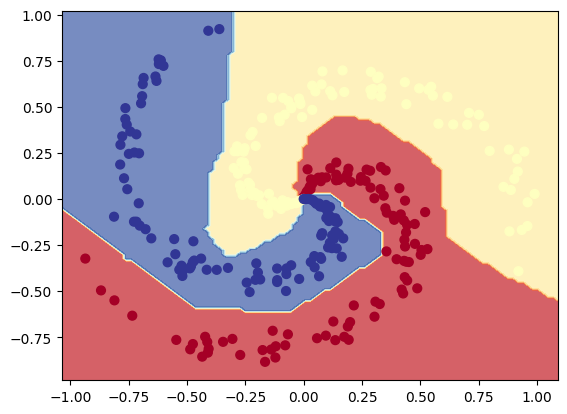

In [10]:
# Lets visualize the boundaries!!

plot_decision_boundary(model, X, y)